# <center> CONTROLE (PI) PARA UM SISTEMA DE PRIMEIRA ORDEM </center>

### Bibliotecas usadas 

In [42]:
# Importar pacotes
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Importar pacote de controle deslizante
from matplotlib.widgets import Slider

# Alterar o back-end do matplotlib
%matplotlib notebook


### Biblioteca de Controle 

In [43]:
# Importando biblioteca de controle
import control as clt
import control.matlab as ctr

### Criando as Funções de Transferência para o sistema em malha fechada e simulando a Resposta do sistema para uma Degrau Unitário

In [45]:
def sistema(kp, ki):
    
    # Função de Transferência do Controlador PI
    num2 = [kp, ki]
    den2 = [1,0]
    PI = ctr.tf(num2, den2)
    print(f"Função de Transferência do Controlador PI:\n {PI}")

    # Função de Transferência da Planta (Sistema)
    num1 = [1]
    den1 = [1,1]
    G_s = ctr.tf(num1, den1)
    print(f"Função de Transferência da Planta (Sistema):\n {G_s}")

    # Função de Transferência G_s em Série com PI (G_s + PI)
    G_PI = ctr.series(G_s, PI)
    print(f"Função de Transferência G_s em Série com PI (G_s + PI):\n {G_PI}")

    #  Realimentação Função de transf. de malha fechada
    T_s = ctr.feedback(G_PI, 1, sign=-1)
    print(f"Realimentação Função de transferência em malha fechada:\n {T_s}")
    
    #  Resposta ao Degrau unitário
    y,t = ctr.step(T_s, 10)
    
    return t, y



# Gráfico Dinâmico para simulação do sistema para valores de Kp e Ki diferentes

<IPython.core.display.Javascript object>


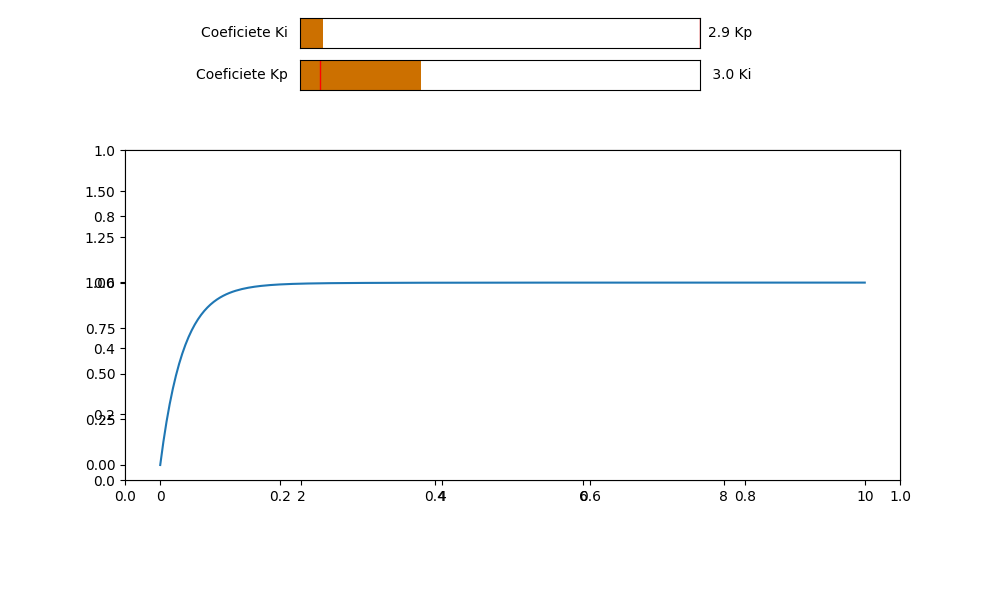

Função de Transferência do Controlador PI:
 
s + 50
------
  s

Função de Transferência da Planta (Sistema):
 
  1
-----
s + 1

Função de Transferência G_s em Série com PI (G_s + PI):
 
s + 50
-------
s^2 + s

Realimentação Função de transferência em malha fechada:
 
    s + 50
--------------
s^2 + 2 s + 50



0

In [46]:
# Criar figura e adicionar eixos
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Create main axis
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2, top=0.75)

# Dados padrão do gráfico
x, y = sistema(1, 50)
f_d, = ax.plot(x, y, linewidth=1.5)

# Criar eixos para controles deslizantes
ax_Ef = fig.add_axes([0.3, 0.85, 0.4, 0.05])
ax_Ef.spines['top'].set_visible(True)
ax_Ef.spines['right'].set_visible(True)

ax_T = fig.add_axes([0.3, 0.92, 0.4, 0.05])
ax_T.spines['top'].set_visible(True)
ax_T.spines['right'].set_visible(True)

# Criar controles deslizantes
k_p = Slider(ax=ax_Ef, label='Coeficiete Kp ', valmin=0, valmax=10,
              valfmt=' %1.1f Ki', facecolor='#cc7000')
k_i = Slider(ax=ax_T, label='Coeficiete Ki ', valmin=0, valmax=50, 
             valinit=50, valfmt='%1.1f Kp', facecolor='#cc7000')

# Atualizar valores
def update(val):
    ki = k_i.val
    kp = k_p.val
    x, y = sistema(kp, ki)
    f_d.set_data(x, y)
    fig.canvas.draw_idle()
    
k_i.on_changed(update)
k_p.on_changed(update)